In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import sys
import pandas as pd 
import TPC
from matplotlib.text import Text
import matplotlib.colors as colors
from tqdm.auto import tqdm
from scipy.interpolate import interp1d

plt.style.use('~/evanstyle.mplstyle')

# Attempting some real calculations for Run 39-42

Doing 0th
Doing 0th
Doing 0th
Doing 0th


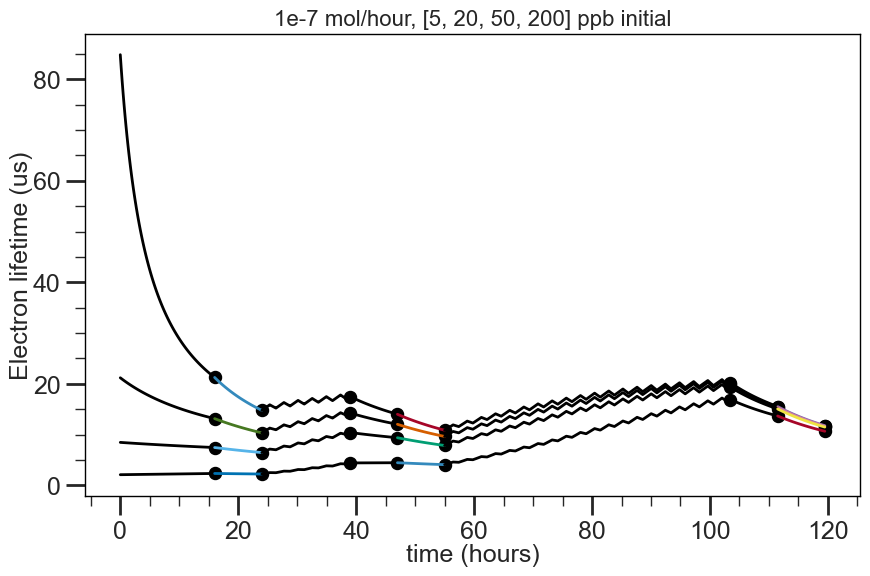

In [17]:
tpc = TPC.TPC(12, 25.048/2, 7.86)

#these variables are initial conditions and constants
ogas = 1e-7 #mols/hour, for example
eps = 1
f = 1
x0 = 200 #ppb


#the DS01 - 04 goes as follows
#Run 42
#DS01: after filling, we go through radon source for 8 hours no SAES
#DS02: go through Rn source and SAES at 2.5 g/min for 16h, 8 hours of data taking
#DS03: go through SAES at 18.4 g/min for 15h and then Rn src at 2.5 g/min for 8h
#DS04: go through SEAS at 18.4 g/min for 48h and then Rn src at 2.5 g/min for 8h

rrs = [2.5, 0, 18.4, 2.5, 0, 18.4, 2.5, 0] #all recirc rates
durations = [16, 8, 15, 8, 8, 48, 8, 8] #all durations at those recirc rates
duty = 0.58
period = 2.15 #duty cycled fast recirc

fig, ax = plt.subplots()

x0s = [5, 20, 50, 200]
#x0 = 200
ds_count = 2
for x0 in x0s:
    for i in range(len(rrs)):
        recirc_rate = rrs[i]
        total_t = durations[i]
        if(i == 0):
            print("Doing 0th")
            ts, xs, taus = tpc.get_purity_snippet(recirc_rate, ogas, eps, f, x0, total_t)
            ax.plot(ts, taus, 'k')
            ax.scatter([ts[-1]], [taus[-1]], s=300, color='k')
            t0 = ts[-1]
            x0 = xs[-1]
            continue

        if(recirc_rate == 18.4):
            ts, xs, taus = tpc.get_purity_snippet_duty_cycled(recirc_rate, ogas, eps, f, x0, total_t, period, duty)
        else:
            ts, xs, taus = tpc.get_purity_snippet(recirc_rate, ogas, eps, f, x0, total_t)

        ts = ts + t0
        if(recirc_rate == 0):
            ax.plot(ts, taus, label="DS" + str(ds_count).zfill(2) + " data taking")
            ds_count += 1
        else:
            ax.plot(ts, taus, 'k')

        ax.scatter([ts[-1]], [taus[-1]], s=300, color='k')
        

        t0 = ts[-1]
        x0 = xs[-1]
        




#ax.set_yscale('log')

#axt = ax.secondary_yaxis('right')
#axt.set_yticks(ax.get_yticks()) 
#axt.set_yticklabels([Text(0, yval, f'{tpc.getX(yval):.1f}') for yval in ax.get_yticks()])


#axt.set_ylabel("mole fraction (ppb)")
ax.set_xlabel("time (hours)")
ax.set_ylabel("Electron lifetime (us)")
#ax.legend()
ax.set_title("1e-7 mol/hour, [5, 20, 50, 200] ppb initial")
#ax.set_xlim([0, 20])
#ax.set_ylim([0, 5])
#ax.set_title("{:.1f} g/min, outgassing {:.0e} mols/hour, initial impurity {:.0f} ppb".format(recirc_rate, ogas, x0*1e9))
plt.show()

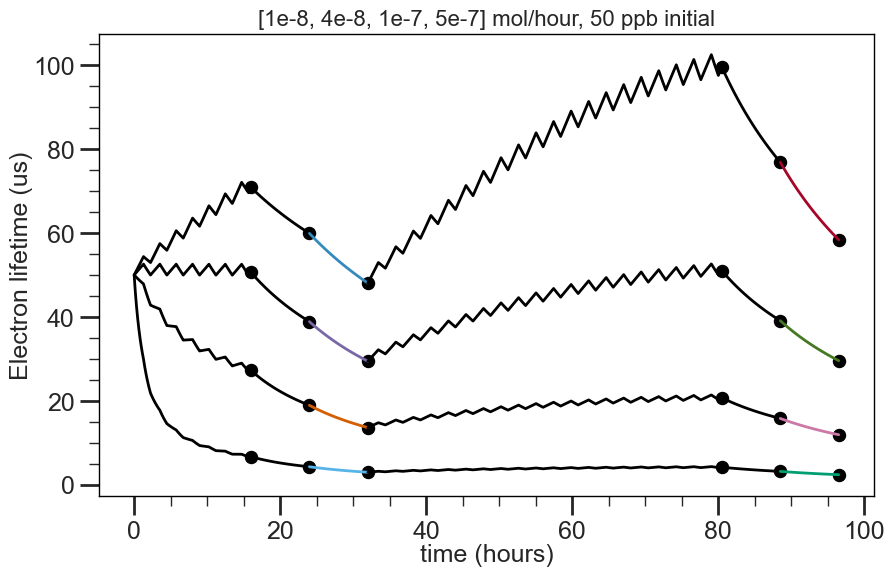

In [9]:
#these variables are initial conditions and constants
ogas = 1e-7 #mols/hour, for example
eps = 1
f = 1


#the DS01 - 04 goes as follows
#Run 42
#DS01: after filling, we go through radon source for 8 hours no SAES
#DS02: go through Rn source and SAES at 2.5 g/min for 16h, 8 hours of data taking
#DS03: go through SAES at 18.4 g/min for 15h and then Rn src at 2.5 g/min for 8h
#DS04: go through SEAS at 18.4 g/min for 48h and then Rn src at 2.5 g/min for 8h

rrs = [18.4, 2.5, 0, 18.4, 2.5, 0] #all recirc rates
durations = [16, 8, 8, 48, 8, 8] #all durations at those recirc rates
duty = 0.58
period = 2.15 #duty cycled fast recirc

fig, ax = plt.subplots()

gasses = [2e-8, 4e-8, 1e-7, 5e-7]
ds_count = 2
for ogas in gasses:
    x0 = tpc.getX(50)
    for i in range(len(rrs)):
        recirc_rate = rrs[i]
        total_t = durations[i]
        if(i == 0):
            if(recirc_rate == 18.4):
                ts, xs, taus = tpc.get_purity_snippet_duty_cycled(recirc_rate, ogas, eps, f, x0, total_t, period, duty)
            else:
                ts, xs, taus = tpc.get_purity_snippet(recirc_rate, ogas, eps, f, x0, total_t)
            ax.plot(ts, taus, 'k')
            ax.scatter([ts[-1]], [taus[-1]], s=300, color='k')
            t0 = ts[-1]
            x0 = xs[-1]
            continue

        
        if(recirc_rate == 18.4):
            ts, xs, taus = tpc.get_purity_snippet_duty_cycled(recirc_rate, ogas, eps, f, x0, total_t, period, duty)
        else:
            ts, xs, taus = tpc.get_purity_snippet(recirc_rate, ogas, eps, f, x0, total_t)
            
        ts = ts + t0
        if(recirc_rate == 0):
            ax.plot(ts, taus, label="DS" + str(ds_count).zfill(2) + " data taking")
            ds_count += 1
        else:
            ax.plot(ts, taus, 'k')

        ax.scatter([ts[-1]], [taus[-1]], s=300, color='k')
        

        t0 = ts[-1]
        x0 = xs[-1]
  



#ax.set_yscale('log')

#axt = ax.secondary_yaxis('right')
#axt.set_yticks(ax.get_yticks()) 
#axt.set_yticklabels([Text(0, yval, f'{tpc.getX(yval):.1f}') for yval in ax.get_yticks()])


#axt.set_ylabel("mole fraction (ppb)")
ax.set_xlabel("time (hours)")
ax.set_ylabel("Electron lifetime (us)")
#ax.legend()
ax.set_title("[1e-8, 4e-8, 1e-7, 5e-7] mol/hour, 50 ppb initial")
#ax.set_xlim([0, 20])
#ax.set_ylim([0, 5])
#ax.set_title("{:.1f} g/min, outgassing {:.0e} mols/hour, initial impurity {:.0f} ppb".format(recirc_rate, ogas, x0*1e9))
plt.show()

In [22]:
#these variables are initial conditions and constants
ogas = 1e-7 #mols/hour, for example
eps = 1
f = 1
x0 = 50 #ppb


#the DS01 - 04 goes as follows
#Run 42
#DS01: after filling, we go through radon source for 8 hours no SAES
#DS02: go through Rn source and SAES at 2.5 g/min for 16h, 8 hours of data taking
#DS03: go through SAES at 18.4 g/min for 15h and then Rn src at 2.5 g/min for 8h
#DS04: go through SEAS at 18.4 g/min for 48h and then Rn src at 2.5 g/min for 8h
rrs = [2.5, 0, 18.4, 2.5, 0, 18.4, 2.5, 0] #all recirc rates
idx_of_ds = {1: 2, 4:3, 7:4}
durations = [16, 8, 15, 8, 8, 48, 8, 8] #all durations at those recirc rates

N = 1000
gasses = np.array(np.linspace(1e-8, 1e-6, N))
tau0s = np.array(np.linspace(1, 100, N))
x0s = tpc.getX(tau0s)

Ox, X = np.meshgrid(gasses, x0s)
Ot, T = np.meshgrid(gasses, tau0s)

T_DS = {2: np.zeros((N, N)), 3: np.zeros((N,N)), 4: np.zeros((N,N))}
looper = tqdm(range(N))
for i in looper:
    for j in range(N):
        x0 = X[i][j]
        ogas = Ox[i][j]
        for b in range(len(rrs)):
            recirc_rate = rrs[b]
            total_t = durations[b]
            if(b == 0):
                ts, xs, taus = tpc.get_purity_snippet(recirc_rate, ogas, eps, f, x0, total_t)
                t0 = ts[-1]
                x0 = xs[-1]
                continue

            
            if(recirc_rate == 18.4):
                ts, xs, taus = tpc.get_purity_snippet_duty_cycled(recirc_rate, ogas, eps, f, x0, total_t, period, duty)
            else:
                ts, xs, taus = tpc.get_purity_snippet(recirc_rate, ogas, eps, f, x0, total_t)
                
            ts = ts + t0
            if(b in idx_of_ds):
                ds = idx_of_ds[b]
                T_DS[ds][i][j] = np.mean(taus) #measure the mean of taus over the 8h data taking period
            

            t0 = ts[-1]
            x0 = xs[-1]

            




100%|██████████| 1000/1000 [13:22<00:00,  1.25it/s]


In [ ]:
fig, ax = plt.subplots()
heat = ax.imshow(T_DS[4], cmap='viridis', \
        extent=[Ot.min(), Ot.max(), T.min(), T.max()],\
        interpolation='nearest', aspect='auto', origin='lower', \
                norm=colors.LogNorm())
cbar = fig.colorbar(heat, ax=ax)
cbar.set_label("Lifetime at DS04", labelpad=3)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel("Outgassing [mol/hour]")
ax.set_ylabel("Initial lifetime DS01 [us]")
plt.show()

fig, ax = plt.subplots()
heat = ax.imshow(T_DS[3], cmap='viridis', \
        extent=[Ot.min(), Ot.max(), T.min(), T.max()],\
        interpolation='nearest', aspect='auto', origin='lower', \
                norm=colors.LogNorm())
cbar = fig.colorbar(heat, ax=ax)
cbar.set_label("Lifetime at DS03", labelpad=3)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel("Outgassing [mol/hour]")
ax.set_ylabel("Initial lifetime DS01 [us]")
plt.show()

fig, ax = plt.subplots()
heat = ax.imshow(T_DS[2], cmap='viridis', \
        extent=[Ot.min(), Ot.max(), T.min(), T.max()],\
        interpolation='nearest', aspect='auto', origin='lower', \
                norm=colors.LogNorm())
cbar = fig.colorbar(heat, ax=ax)
cbar.set_label("Lifetime at DS02", labelpad=3)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel("Outgassing [mol/hour]")
ax.set_ylabel("Initial lifetime DS01 [us]")
plt.show()

# More sophisticated analysis for runs

The objective with this system is to code in all of the run information from each run in the format seen in "run_history_data.yml" file. For each run, the space of outgassing rates is scanned with a maximum likelihood estimation on the electron lifetimes measured at each point in time, errors incorporated and reported at each step along the way. 

In [3]:
#import the run history data
import yaml 

with open("run_history_data_new.yml", "r") as nf:
    runs = yaml.safe_load(nf)

### Plots that summarize measured lifetimes / purities from runs 

Run 38 is flagged as not ready to analyze yet, skipping over
Working on Run 39
[ 59.   67.   70.5  90.5 108.5 116.5]
Working on Run 41
[ 16.   24.   39.   46.5  54.5 118.5 126.5 134.5]
Working on Run 42
[ 16  24  39  47  55 103 111 119]
Working on Run 43
[ 16.3   24.3   38.8   63.05  71.05  88.05  93.05 111.55 119.05 135.05]
Working on Run 44
[ 15.75  23.75  39.75  64.75  82.25  90.25  91.75 107.75 131.25 138.75
 139.75 153.75]


/Users/ejangelico/Documents/Stanford/ESIII/software/PurityCalculator/TPC.py:30: RuntimeWarning: divide by zero encountered in double_scalars
  return (self.tau_conv/tau)
/Users/ejangelico/Documents/Stanford/ESIII/software/PurityCalculator/TPC.py:30: RuntimeWarning: divide by zero encountered in double_scalars
  return (self.tau_conv/tau)
/Users/ejangelico/Documents/Stanford/ESIII/software/PurityCalculator/TPC.py:30: RuntimeWarning: divide by zero encountered in double_scalars
  return (self.tau_conv/tau)
/Users/ejangelico/Documents/Stanford/ESIII/software/PurityCalculator/TPC.py:30: RuntimeWarning: divide by zero encountered in double_scalars
  return (self.tau_conv/tau)


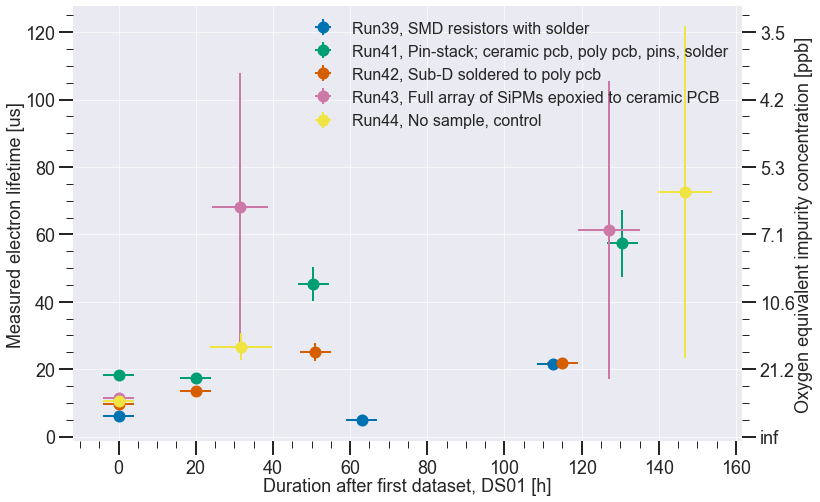

In [8]:
fig, axt = plt.subplots()

axp = axt.secondary_yaxis('right')

for num, run in runs.items():
    if(run["ready"] == 0):
        print("Run {:d} is flagged as not ready to analyze yet, skipping over".format(num))
        continue

    #check to see if the lifetimes, errors, and time_idx lists have matching lengths
    temp = len(run["lifetimes"])
    if(len(run["errors"]) != temp or len(run["time_idx"]) != temp):
        print("Lengths of lifetimes ({:d}), errors ({:d}), and time_idx ({:d}) do not match! Skipping Run {:d}".format(temp, len(run["errors"]), len(run["time_idx"]), num))
        continue
    
    #check to see if the circulation durations and rates have matching lengths
    if(len(run["circ"]) != len(run["circ_t"])):
        print("Lengths of circulation rates ({:d}) and circulation durations ({:d}) do not match! Skipping run {:d}".format(len(run["circ"]), len(run["circ_t"]), num))
        continue
    
    print("Working on Run {:d}".format(num))
    #create TPC with that mass of xenon, assuming STPC
    tpc = TPC.TPC(run["xe_mass"], 25.048/2, 7.86)
    #get measured x0s and errors associated
    x0s = tpc.getX(np.array(run["lifetimes"]))
    lt_errs = np.array(run["errors"])/np.array(run["lifetimes"])

    #get the time in hours from start using the sub-durations from the yaml file
    dataset_times = [] 
    dataset_time_err = []
    cumulative_time = np.cumsum(run["circ_t"])
    print(cumulative_time)
    #if DS02 has index i, then the dataset was taken over a run["circ_t"][i] 
    #many hours duration. So the measurement of lifetime I will call the lifetime
    #measured at 1/2 the duration of the dataset, whereas more accurately it would 
    #be the mean of an exponential decay - but that decay constant is unknown. 
    ds_idxs = run["time_idx"]
    for i in range(len(ds_idxs)):
        _ = ds_idxs[i]
        if(_ == "None" and i == 0):
            dataset_times.append(0)
            dataset_time_err.append(4) #assume first dataset is 8h
            continue
        dataset_duration = run["circ_t"][_]
        #this is the "measured lifetime at 1/2 way through dataset"
        dataset_times.append(cumulative_time[_] - 0.5*dataset_duration) 
        dataset_time_err.append(0.5*dataset_duration)
    
    
    axt.errorbar(dataset_times, run["lifetimes"], fmt='o', xerr=dataset_time_err, yerr=run["errors"], markersize=12, label="Run{:d}, ".format(num) + run["sample"])

    axp.set_yticks(axt.get_yticks()) 
    axp.set_yticklabels([Text(0, yval, f'{tpc.getX(yval):.1f}') for yval in axt.get_yticks()])


axt.legend()
axt.set_xlabel("Duration after first dataset, DS01 [h]")
axt.set_ylabel("Measured electron lifetime [us]")
axp.set_ylabel("Oxygen equivalent impurity concentration [ppb]")
#axt.set_ylim([0, 80])
plt.show()
    

In [135]:
def plot_run(run, best_curve=None, low_curve=None, hi_curve=None, show=True, title=''):
    fig, axt = plt.subplots()
    axt.set_title(title)
    axp = axt.secondary_yaxis('right')
    #create TPC with that mass of xenon, assuming STPC
    tpc = TPC.TPC(run["xe_mass"], 25.048/2, 7.86)

    #get the time in hours from start using the sub-durations from the yaml file
    dataset_times = [] 
    dataset_time_err = []
    cumulative_time = np.cumsum(run["circ_t"])
    #if DS02 has index i, then the dataset was taken over a run["circ_t"][i] 
    #many hours duration. So the measurement of lifetime I will call the lifetime
    #measured at 1/2 the duration of the dataset, whereas more accurately it would 
    #be the mean of an exponential decay - but that decay constant is unknown. 
    ds_idxs = run["time_idx"]
    for i in range(len(ds_idxs)):
        _ = ds_idxs[i]
        if(_ == "None" and i == 0):
            dataset_times.append(0)
            dataset_time_err.append(4) #assume first dataset is 8h
            continue
        dataset_duration = run["circ_t"][_]
        #this is the "measured lifetime at 1/2 way through dataset"
        dataset_times.append(cumulative_time[_] - 0.5*dataset_duration) 
        dataset_time_err.append(0.5*dataset_duration)
    
    
    axt.errorbar(dataset_times, run["lifetimes"], fmt='o', xerr=dataset_time_err, yerr=run["errors"], markersize=12, label="Run{:d}, ".format(num) + run["sample"])

    #plot reconstructed outgassing curves if not none
    if(best_curve != None):
        axt.plot(best_curve[0], tpc.getTau(np.array(best_curve[1])), 'k-')
    if(low_curve != None):
        axt.plot(low_curve[0], tpc.getTau(np.array(low_curve[1])), 'k-')
    if(hi_curve != None):
        axt.plot(hi_curve[0], tpc.getTau(np.array(hi_curve[1])), 'k-')


    axp.set_yticks(axt.get_yticks()) 
    axp.set_yticklabels([Text(0, yval, f'{tpc.getX(yval):.1f}') for yval in axt.get_yticks()])


    axt.legend()
    axt.set_xlabel("Duration after first dataset, DS01 [h]")
    axt.set_ylabel("Measured electron lifetime [us]")
    axp.set_ylabel("Oxygen equivalent impurity concentration [ppb]")
    if(show):
        plt.show()
    return axt

In [60]:
def simulate_outgassing(tpc, ogas, x0, run):
    rrs = run["circ"]
    durations = run["circ_t"]
    all_ts = np.array([])
    all_xs = np.array([])
    for i in range(len(rrs)):
        recirc_rate = rrs[i]
        total_t = durations[i]
        if(i == 0):
            #stupid complexity due to duty cycled recirc, this is for the program "fast recirc"
            #with 1100 and 1300 torr thresholds. But we found is also dependent on temperature strongly. 
            #this is the best guess...
            if(recirc_rate == 18.4):
                ts, xs, taus = tpc.get_purity_snippet_duty_cycled(recirc_rate, ogas, eps, f, x0, total_t, 2.15, 0.58)
            else:
                ts, xs, taus = tpc.get_purity_snippet(recirc_rate, ogas, eps, f, x0, total_t)
            t0 = ts[-1]
            x0 = xs[-1]
            all_ts = np.concatenate([all_ts, ts])
            all_xs = np.concatenate([all_xs, xs])
            continue

        #stupid complexity due to duty cycled recirc, this is for the program "fast recirc"
        #with 1100 and 1300 torr thresholds. But we found is also dependent on temperature strongly. 
        #this is the best guess...
        if(recirc_rate == 18.4):
            ts, xs, taus = tpc.get_purity_snippet_duty_cycled(recirc_rate, ogas, eps, f, x0, total_t, 2.15, 0.58)
        else:
            ts, xs, taus = tpc.get_purity_snippet(recirc_rate, ogas, eps, f, x0, total_t)
            
        ts = ts + t0

        

        t0 = ts[-1]
        x0 = xs[-1]
        all_ts = np.concatenate([all_ts, ts])
        all_xs = np.concatenate([all_xs, xs])
        
    return all_ts, all_xs
    

In [118]:
#global parameters
eps = 1
f = 1
ogas_range = [-14, -5]
N = 100
ogases = np.array(np.logspace(min(ogas_range), max(ogas_range), N))
debug_mode = 2
# confidence interval cumulative for chi^2/ndf distribution, indexed by ndof
#https://people.richland.edu/james/lecture/m170/tbl-chi.html
#conf = {1:2.706, 2:4.605/2, 3:6.251/3, 4:7.779/4, 5:9.236/5, 6:10.645/6, 7:12.017/7} #90%
conf = {1:1.323, 2:2.773/2, 3:4.108/3, 4:5.385/4, 5:6.626/5, 6:7.841/6, 7:9.037/7} #75%

Run 38 is flagged as not ready to analyze yet, skipping over
Run 39 is flagged as not ready to analyze yet, skipping over
Working on Run 41


Looping through outgassing range...: 100%|██████████| 100/100 [00:00<00:00, 933.78it/s]


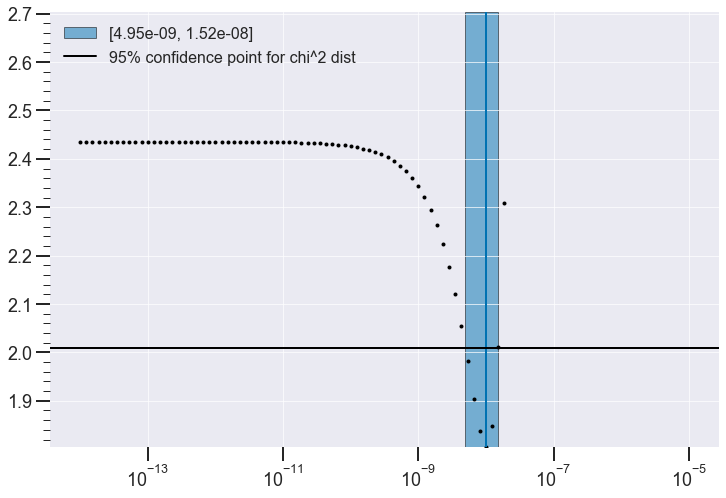

Working on Run 42


Looping through outgassing range...: 100%|██████████| 100/100 [00:00<00:00, 732.29it/s]


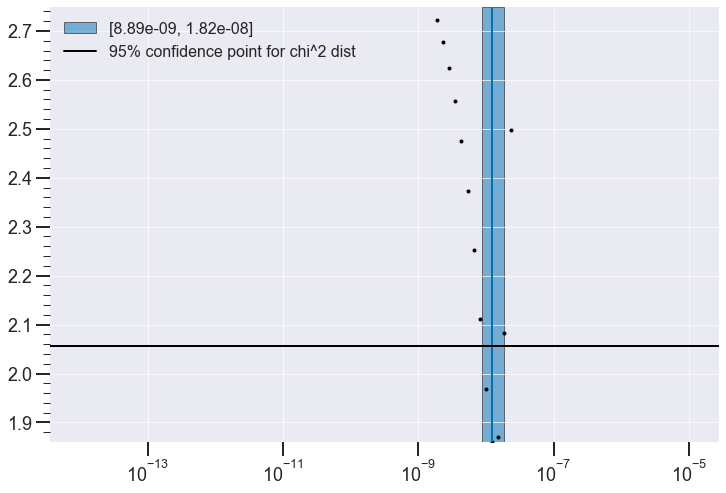

Run 43 is flagged as not ready to analyze yet, skipping over
Run 44 is flagged as not ready to analyze yet, skipping over


In [119]:
result_dict = {}

for num, run in runs.items():
    if(run["ready"] == 0):
        print("Run {:d} is flagged as not ready to analyze yet, skipping over".format(num))
        continue

    #check to see if the lifetimes, errors, and time_idx lists have matching lengths
    temp = len(run["lifetimes"])
    if(len(run["errors"]) != temp or len(run["time_idx"]) != temp):
        print("Lengths of lifetimes ({:d}), errors ({:d}), and time_idx ({:d}) do not match! Skipping Run {:d}".format(temp, len(run["errors"]), len(run["time_idx"]), num))
        continue
    
    #check to see if the circulation durations and rates have matching lengths
    if(len(run["circ"]) != len(run["circ_t"])):
        print("Lengths of circulation rates ({:d}) and circulation durations ({:d}) do not match! Skipping run {:d}".format(len(run["circ"]), len(run["circ_t"]), num))
        continue
    
    print("Working on Run {:d}".format(num))
    #create TPC with that mass of xenon, assuming STPC
    tpc = TPC.TPC(run["xe_mass"], 25.048/2, 7.86)
    #get measured x0s and errors associated
    x0s = tpc.getX(np.array(run["lifetimes"]))
    lt_errs = np.array(run["errors"])/np.array(run["lifetimes"])

    #make a plot of the run 
    if(debug_mode == 0):
        plot_run(run)


    #calculate the time and time ranges over which data was taken
    #get the time in hours from start using the sub-durations from the yaml file
    dataset_times = [] 
    dataset_time_err = []
    cumulative_time = np.cumsum(run["circ_t"])
    #if DS02 has index i, then the dataset was taken over a run["circ_t"][i] 
    #many hours duration. So the measurement of lifetime I will call the lifetime
    #measured at 1/2 the duration of the dataset, whereas more accurately it would 
    #be the mean of an exponential decay - but that decay constant is unknown. 
    ds_idxs = run["time_idx"]
    for i in range(len(ds_idxs)):
        _ = ds_idxs[i]
        if(_ == "None" and i == 0):
            dataset_times.append(0)
            dataset_time_err.append(4) #assume first dataset is 8h
            continue
        dataset_duration = run["circ_t"][_]
        #this is the "measured lifetime at 1/2 way through dataset"
        dataset_times.append(cumulative_time[_] - 0.5*dataset_duration) 
        dataset_time_err.append(0.5*dataset_duration)
    
    #loop through the outgassing options, create an evolution of the system
    looper = tqdm(ogases, desc="Looping through outgassing range...")
    chi2_vs_ogas = [] #chi2 indexed relative to outgassing as the free parameter
    ndof = len(dataset_times) - 1 - 1 #number of datasets - first dataset DS01 - 1 fit parameter
    for ogas in looper:
        sim_times, sim_xs = simulate_outgassing(tpc, ogas, x0s[0], run)
        if(debug_mode == 1):
            fig, ax = plt.subplots()
            ax.plot(sim_times, sim_xs)
            plt.show()
        #interpolate to find the simulated purity at the dataset times
        sim_xs_int = interp1d(sim_times, sim_xs)
        #the purities that would be at the dataset times
        sim_xs_datasets = sim_xs_int(np.array(dataset_times))

        #the first data point is t = 0 purity, which is constrained as the initial
        #condition of the model. 
        chi2 = 0
        for i in range(1, len(dataset_times)):
            x0_err = lt_errs[i]*x0s[i]
            chi2 += ((x0s[i] - sim_xs_datasets[i])**2)/(x0_err)
        chi2 = chi2/ndof
        chi2_vs_ogas.append(chi2)
    
    best_chi2 = min(chi2_vs_ogas)
    best_idx = chi2_vs_ogas.index(best_chi2)
    best_ogas = ogases[best_idx]

    #find the place on either side of the minimum 
    #where the chi^2/ndf goes above the 95% cumulative
    #point of the chi^2 distribution
    sect = conf[ndof] + best_chi2

    #this is a one sided test if the following occurs. Start from that side
    #and interpolate until you find the intersection of chi^2
    #with the 95% cumulative value. 
    interval = [None, None]
    if(best_idx == 0):
        chi2_interp = interp1d(chi2_vs_ogas, ogases)
        interval[1] = chi2_interp(sect)
    elif(best_idx == len(ogases - 1)):
        chi2_interp = interp1d(chi2_vs_ogas[::-1], ogases[::-1])
        interval[0] = chi2_interp(sect)
    else:
        chi2_low = chi2_vs_ogas[:best_idx][::-1]
        chi2_hi = chi2_vs_ogas[best_idx:]
        if(max(chi2_low) < sect):
            interval[0] = None
        else:
            chi2_interp_low = interp1d(chi2_vs_ogas[:best_idx][::-1], ogases[:best_idx][::-1])
            interval[0] = chi2_interp_low(sect)
        if(max(chi2_hi) < sect):
            interval[1] = None
        else:
            chi2_interp_hi = interp1d(chi2_vs_ogas[best_idx:], ogases[best_idx:])
            interval[1] = chi2_interp_hi(sect)

    if(debug_mode == 2):
        fig, ax = plt.subplots()
        ax.plot(ogases, np.log(np.array(chi2_vs_ogas)), 'ko')
        ax.axvline(best_ogas)
        if(None in interval):
            if(interval[0] is None):
                ax.axvline(interval[1], label="{:.2e}".format(interval[1]))
            else:
                ax.axvline(interval[0], label="{:.2e}".format(interval[0]))
        else:
            ax.axvspan(interval[0], interval[1], alpha=0.5, label="[{:.2e}, {:.2e}]".format(interval[0], interval[1]))
        ax.axhline(np.log(sect), color='k', label="95% confidence point for chi^2 dist")
        ax.set_xscale('log')
        ax.set_ylim([np.log(best_chi2), np.log(2*sect)])
        #ax.set_yscale('log')
        ax.legend()
        plt.show()

    #add results to the run dictionary
    result_dict[num] = {}
    result_dict[num]["best_ogas"] = best_ogas
    result_dict[num]["best_chi2"] = best_chi2
    result_dict[num]["ndof"] = ndof
    result_dict[num]["interval"] = interval

    #simulate the best outgassing again for the best value and the interval values
    sim_times, sim_xs = simulate_outgassing(tpc, best_ogas, x0s[0], run)
    result_dict[num]["best_curve"] = [sim_times, sim_xs]
    if(interval[0] != None):
        sim_times, sim_xs = simulate_outgassing(tpc, interval[0], x0s[0], run)
    else:
        sim_times, sim_xs = simulate_outgassing(tpc, 0, x0s[0], run)
    result_dict[num]["low_curve"] = [sim_times, sim_xs]

    if(interval[1] != None):
        sim_times, sim_xs = simulate_outgassing(tpc, interval[1], x0s[0], run)
    else:
        sim_times, sim_xs = simulate_outgassing(tpc, max(ogases), x0s[0], run)
    result_dict[num]["hi_curve"] = [sim_times, sim_xs]



    
    

/Users/ejangelico/Documents/Stanford/ESIII/software/PurityCalculator/TPC.py:30: RuntimeWarning: divide by zero encountered in double_scalars
  return (self.tau_conv/tau)


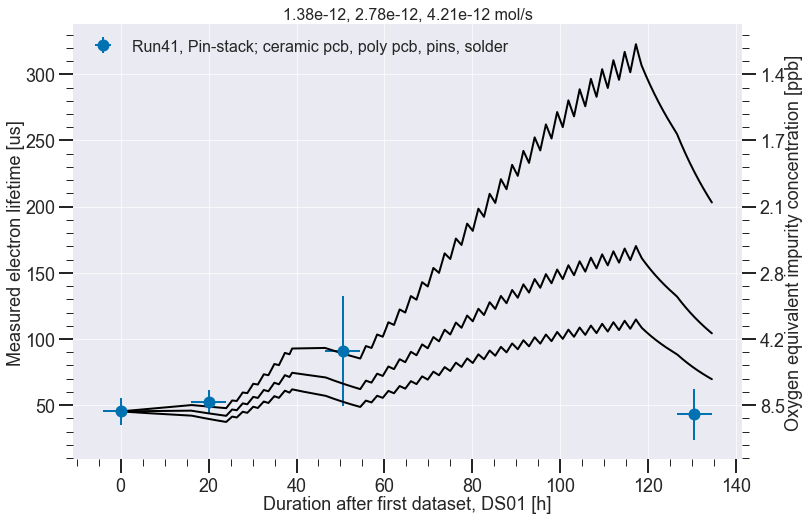

/Users/ejangelico/Documents/Stanford/ESIII/software/PurityCalculator/TPC.py:30: RuntimeWarning: divide by zero encountered in double_scalars
  return (self.tau_conv/tau)


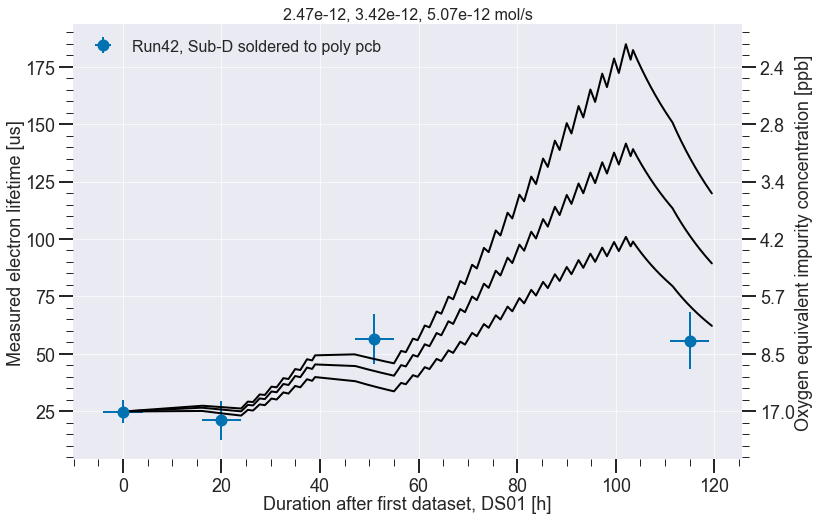

In [136]:

for num, run in runs.items():
    if((num in result_dict) == False):
        continue
    if(run["ready"] == 0):
        print("Run {:d} is flagged as not ready to analyze yet, skipping over".format(num))
        continue

    #check to see if the lifetimes, errors, and time_idx lists have matching lengths
    temp = len(run["lifetimes"])
    if(len(run["errors"]) != temp or len(run["time_idx"]) != temp):
        print("Lengths of lifetimes ({:d}), errors ({:d}), and time_idx ({:d}) do not match! Skipping Run {:d}".format(temp, len(run["errors"]), len(run["time_idx"]), num))
        continue
    
    #check to see if the circulation durations and rates have matching lengths
    if(len(run["circ"]) != len(run["circ_t"])):
        print("Lengths of circulation rates ({:d}) and circulation durations ({:d}) do not match! Skipping run {:d}".format(len(run["circ"]), len(run["circ_t"]), num))
        continue
    
    res = result_dict[num]
    axt = plot_run(run, res["best_curve"], res["low_curve"], res["hi_curve"], title="{:.2e}, {:.2e}, {:.2e} mol/s".format(min(res["interval"])/3600, res["best_ogas"]/3600, max(res["interval"])/3600))


# purity monitor

Doing 0th


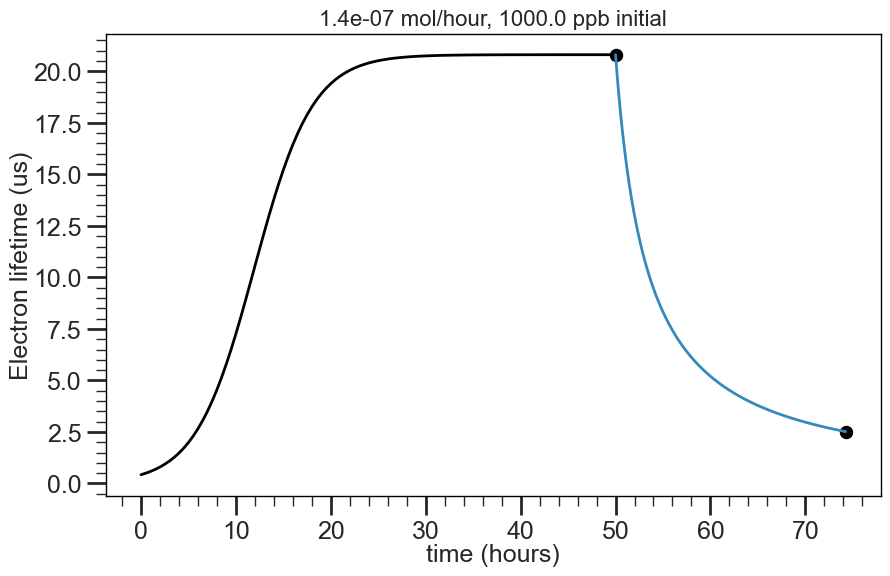

In [16]:
tpc = TPC.TPC(3, 3.2, 25.45)

#these variables are initial conditions and constants
ogas = 1.4e-7 #mols/hour, for example
eps = 1
f = 1



rrs = [15, 0] #all recirc rates
durations = [50, 24] #all durations at those recirc rates
duty = 1
period = 2.15 #duty cycled fast recirc

fig, ax = plt.subplots()

x0s = [1000]
for x0 in x0s:
    for i in range(len(rrs)):
        recirc_rate = rrs[i]
        total_t = durations[i]
        if(i == 0):
            print("Doing 0th")
            ts, xs, taus = tpc.get_purity_snippet(recirc_rate, ogas, eps, f, x0, total_t)
            ax.plot(ts, taus, 'k')
            ax.scatter([ts[-1]], [taus[-1]], s=300, color='k')
            t0 = ts[-1]
            x0 = xs[-1]
            continue

        ts, xs, taus = tpc.get_purity_snippet(recirc_rate, ogas, eps, f, x0, total_t)

        ts = ts + t0
        if(recirc_rate == 0):
            ax.plot(ts, taus)
        else:
            ax.plot(ts, taus, 'k')

        ax.scatter([ts[-1]], [taus[-1]], s=300, color='k')
        

        t0 = ts[-1]
        x0 = xs[-1]
        




#ax.set_yscale('log')

#axt = ax.secondary_yaxis('right')
#axt.set_yticks(ax.get_yticks()) 
#axt.set_yticklabels([Text(0, yval, f'{tpc.getX(yval):.1f}') for yval in ax.get_yticks()])


#axt.set_ylabel("mole fraction (ppb)")
ax.set_xlabel("time (hours)")
ax.set_ylabel("Electron lifetime (us)")
#ax.legend()
ax.set_title("{:.1e} mol/hour, {:.1f} ppb initial".format(ogas, x0s[0]))
#ax.set_xlim([0, 20])
#ax.set_ylim([0, 5])
#ax.set_title("{:.1f} g/min, outgassing {:.0e} mols/hour, initial impurity {:.0f} ppb".format(recirc_rate, ogas, x0*1e9))
plt.show()